In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


In [31]:
df = pd.read_csv("D:\Stores.csv")
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [3]:
df.shape

(896, 5)

In [4]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
df.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [6]:
df.sample(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
124,125,1164,1390,370,35510
481,482,1675,2002,1050,64990
858,859,1152,1393,860,54380
841,842,1528,1843,340,59820
813,814,1873,2252,330,79310
333,334,1619,1957,1280,45580
367,368,1484,1774,940,59800
889,890,1539,1829,650,46580
661,662,1427,1720,630,43190
55,56,1417,1701,740,48670


In [7]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [8]:
#Cheack missing value
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Let's drop "Store_Area" feature, because we won't use it
df = df.drop('Store_Area',axis=1)
df

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1961,530,66490
1,2,1752,210,39820
2,3,1609,720,54010
3,4,1748,620,53730
4,5,2111,450,46620
...,...,...,...,...
891,892,1910,1080,66390
892,893,1663,850,82080
893,894,1436,1060,76440
894,895,1560,770,96610


# INFO

In [11]:
#gives a quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [12]:
#display a Statistical summary
df.describe()

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1782.035714,786.350446,59351.305804
std,258.797218,299.872053,265.389281,17190.741895
min,1.000000,932.000000,10.000000,14920.000000
25%,224.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1773.500000,780.000000,58605.000000
75%,672.250000,1982.750000,970.000000,71872.500000
max,896.000000,2667.000000,1560.000000,116320.000000


In [13]:
# Let's see top 5 stores with highest sales

highest_sales = pd.DataFrame(df.nlargest(5, ['Store_Sales']))
highest_sales

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
649,650,2414,860,116320
868,869,2104,980,105150
432,433,1638,680,102920
408,409,1587,1310,102310
758,759,1758,820,101820


In [14]:
# show the top 5 stores with lowest sales

lowest_sales = pd.DataFrame(df.nsmallest(5, ['Store_Sales']))
lowest_sales

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
31,32,1508,990,14920
852,853,1790,880,16370
775,776,1877,660,17670
593,594,1946,870,20270
352,353,1686,850,21300


# EDA

<Axes: >

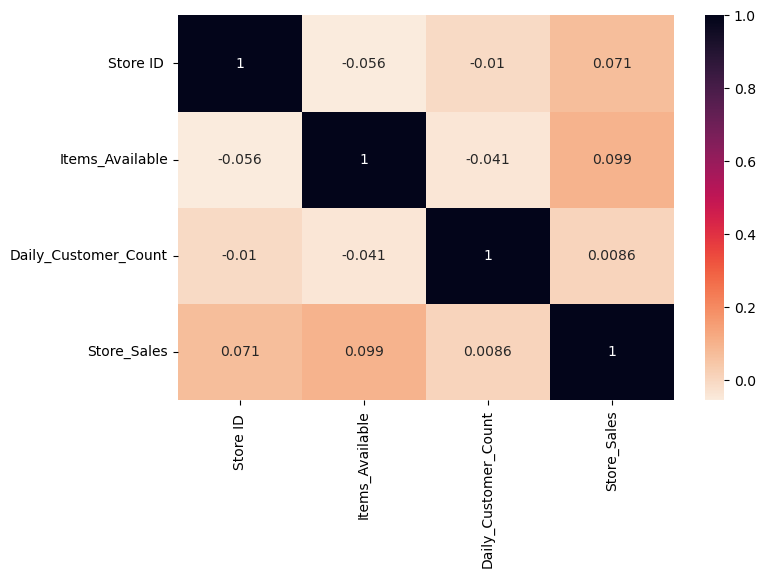

In [15]:
# Let's see the correlation between variables
import seaborn as sns
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r')

C:\Users\cash\AppData\Local\Temp\ipykernel_39120\1543977293.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Store_Area'])


<Axes: xlabel='Store_Area', ylabel='Density'>

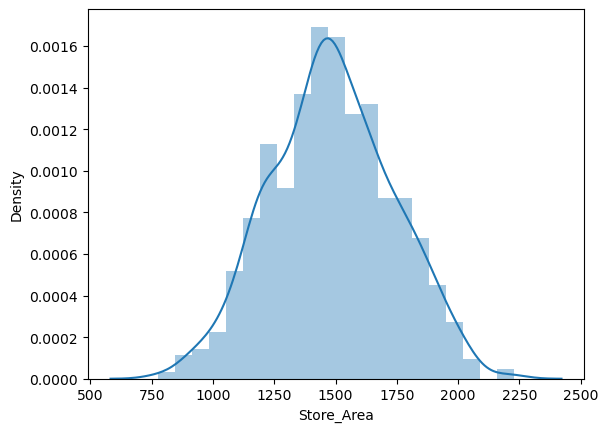

In [32]:
#Graph defines Store Area
sns.color_palette("rocket")
sns.distplot(df['Store_Area'])

C:\Users\cash\AppData\Local\Temp\ipykernel_39120\1281777039.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Daily_Customer_Count'])


<Axes: xlabel='Daily_Customer_Count', ylabel='Density'>

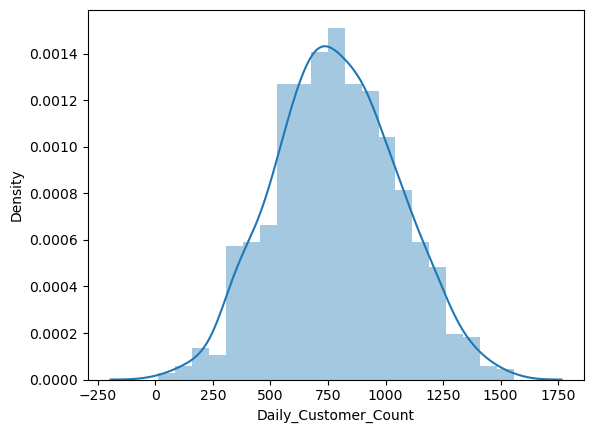

In [17]:
#Graph defines Customer Count
sns.distplot(df['Daily_Customer_Count'])

C:\Users\cash\AppData\Local\Temp\ipykernel_39120\889666011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Store_Sales'])


<Axes: xlabel='Store_Sales', ylabel='Density'>

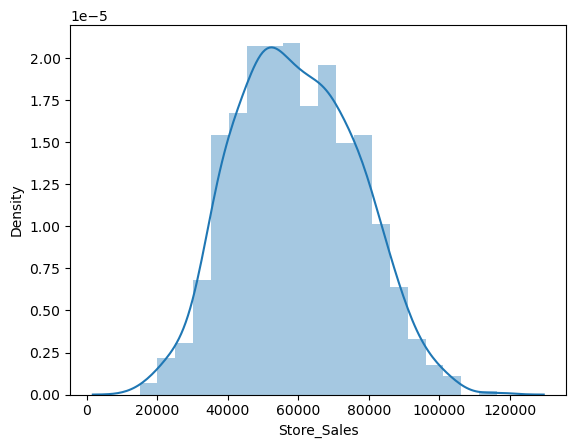

In [18]:
#graph defines Store Sales
sns.distplot(df['Store_Sales'])

# Data Preprocessing¶


In [19]:
y = df['Store_Sales']
X = df.drop('Store_Sales',axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
print('Shape of x_train=',X_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_train=',X_train.shape)
print('Shape of y_train=',y_train.shape)

Shape of x_train= (716, 3)
Shape of y_train= (716,)
Shape of x_train= (716, 3)
Shape of y_train= (716,)


In [21]:
sc = StandardScaler()
X = sc.fit_transform(X)

# Random Forest Regressor

In [22]:

rf = RandomForestRegressor(random_state = 116)
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test)


In [23]:
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
mae = mean_absolute_error(y_test, rf_pred)

score = rf.score(X_train, y_train) 
scores = cross_val_score(rf, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  rf_pred)

In [24]:
print('Random Forest Regressor')
print("MSE: %.2f" % mse)print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

Random Forest Regressor
MSE: 307110827.97
RMSE: 17524.58
MAE: 13976.36
Training score:  0.8535926165837913
Mean cross-validation score: -0.08
K-fold CV average score: -0.08
R_score : -0.13


In [25]:
sales_data_avgs = df.copy()
sales_data_avgs.head()

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1961,530,66490
1,2,1752,210,39820
2,3,1609,720,54010
3,4,1748,620,53730
4,5,2111,450,46620


# Modeling After Clustering

#Linear Regression lr = LinearRegression() lr.fit(X_train, y_train) lr_pred =lr.predict(X_test)

In [26]:
print('Linear Regression')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

Linear Regression
MSE: 307110827.97
RMSE: 17524.58
MAE: 13976.36
Training score:  0.8535926165837913
Mean cross-validation score: -0.08
K-fold CV average score: -0.08
R_score : -0.13
